## CLUSTER EVALUATION

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

#####  DATA INTERPRETATION AND PREPROCESSING 

In [2]:
#LOADING DATASET
df=pd.read_csv('Car_sales.csv')
print(df.shape)
df.head(2)

(157, 16)


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778


In [3]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [4]:
#removing null values
df=df.dropna()
#checking for null values
df.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [5]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [6]:
#SCALING THE DATASET
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [7]:
columns=['Sales_in_thousands', '__year_resale_value','Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency','Power_perf_factor']
df_scaled=df.copy()
df_scaled[columns]=min_max_scaler.fit_transform(df[columns])

In [8]:
#DATASET AFTER SCALING
df_scaled

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,0.031102,0.179516,Passenger,0.167178,0.114286,0.215190,0.186551,0.281437,0.306258,0.231056,0.133641,0.433333,2/2/2012,0.212314
1,Acura,TL,0.072669,0.235855,Passenger,0.261228,0.314286,0.430380,0.336226,0.461078,0.579228,0.503727,0.317972,0.333333,6/3/2011,0.413024
3,Acura,RL,0.015687,0.393733,Passenger,0.446603,0.357143,0.392405,0.477223,0.526946,0.628495,0.607143,0.354839,0.233333,3/10/2011,0.413140
4,Audi,A4,0.037537,0.274002,Passenger,0.201118,0.114286,0.240506,0.216920,0.335329,0.380826,0.342547,0.281106,0.400000,10/8/2011,0.239594
5,Audi,A6,0.034545,0.294839,Passenger,0.336877,0.257143,0.367089,0.349241,0.808383,0.567244,0.517391,0.377880,0.233333,8/9/2011,0.371745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,Golf,0.017857,0.100417,Passenger,0.077217,0.142857,0.151899,0.136659,0.341317,0.185087,0.270807,0.193548,0.366667,1/24/2011,0.143555
146,Volkswagen,Jetta,0.154706,0.129508,Passenger,0.101752,0.142857,0.151899,0.136659,0.341317,0.304927,0.297516,0.193548,0.366667,8/27/2011,0.147766
147,Volkswagen,Passat,0.094351,0.185366,Passenger,0.163089,0.114286,0.240506,0.299349,0.353293,0.462051,0.356522,0.281106,0.400000,10/30/2012,0.233066
148,Volkswagen,Cabrio,0.017502,0.182962,Passenger,0.146596,0.142857,0.151899,0.104121,0.245509,0.146471,0.367702,0.156682,0.366667,5/31/2011,0.155464


In [9]:
df2=df_scaled[['Width','Length']]
df3=df2.copy()

##### TASK 1

#### STATISTICAL EVALUATION

##### ELBOW METHOD

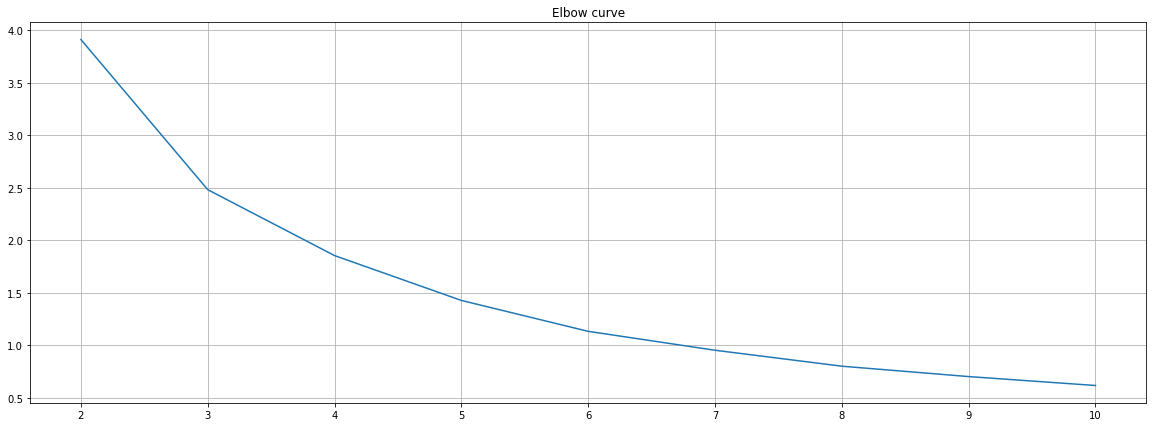

In [10]:
distorsions = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df2)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(20, 7))
plt.plot(range(2, 11), distorsions)
plt.grid(True)
plt.title('Elbow curve');

##### SILHOUETTE VALUE

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.4970102822716554
For n_clusters = 3 The average silhouette_score is : 0.42572617851241035
For n_clusters = 4 The average silhouette_score is : 0.443836971802637
For n_clusters = 5 The average silhouette_score is : 0.4669274442811193
For n_clusters = 6 The average silhouette_score is : 0.4585588814868223
For n_clusters = 7 The average silhouette_score is : 0.46163034670479747
For n_clusters = 8 The average silhouette_score is : 0.4541377152698968
For n_clusters = 9 The average silhouette_score is : 0.4450110916592175
For n_clusters = 10 The average silhouette_score is : 0.42472762467765596


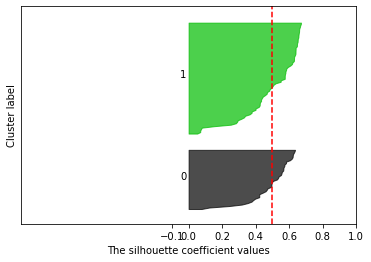

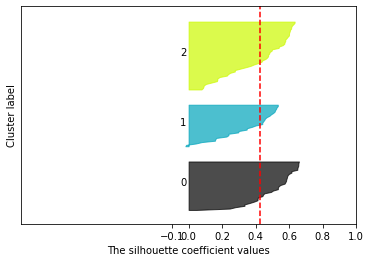

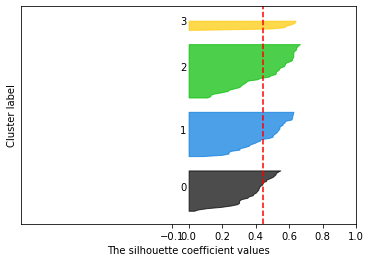

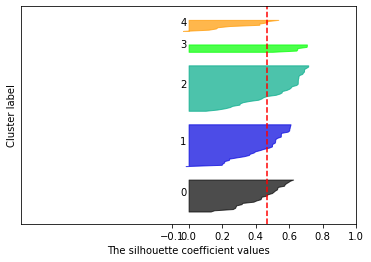

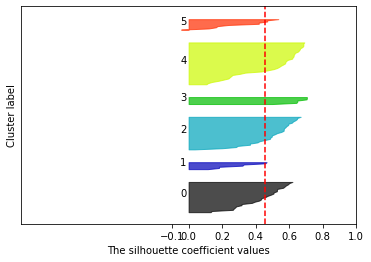

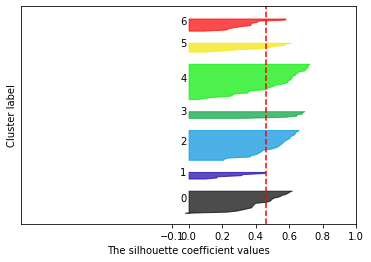

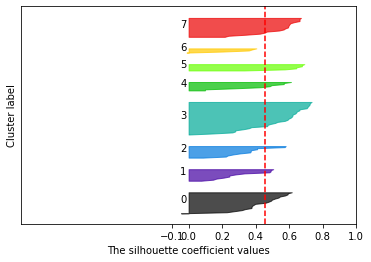

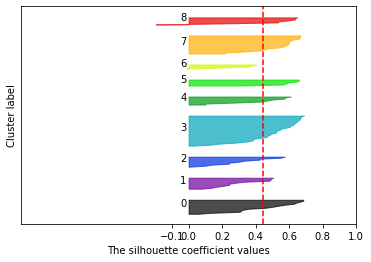

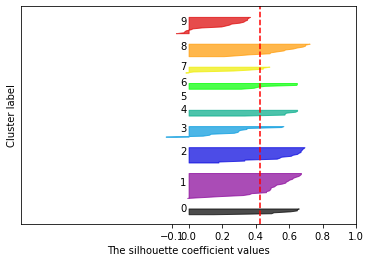

In [12]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(df2) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df2)

    silhouette_avg = silhouette_score(df2, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

n_clusters=5 is choosen as they have high silhouette value and comparitivley less inertia

##### TASK 2

n_clusters value: 2 

[[0.39300347 0.41360642]
 [0.73930188 0.6893248 ]]


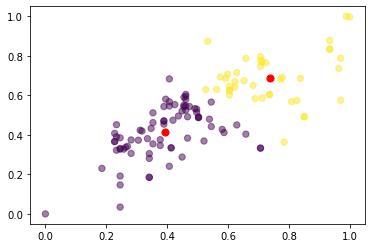

n_clusters value: 3 

[[0.29224884 0.31550525]
 [0.50862275 0.52431425]
 [0.78153371 0.71362914]]


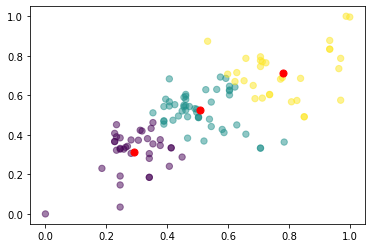

n_clusters value: 4 

[[0.48160821 0.50396297]
 [0.96182635 0.82972703]
 [0.2905047  0.31131824]
 [0.69030689 0.65612517]]


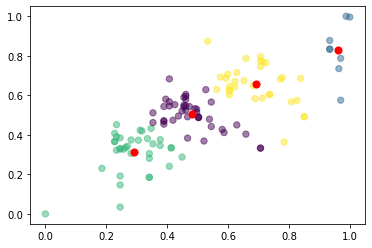

n_clusters value: 5 

[[0.45784107 0.5198834 ]
 [0.65891294 0.68549626]
 [0.2905047  0.31131824]
 [0.94810379 0.81372984]
 [0.74071856 0.44181092]]


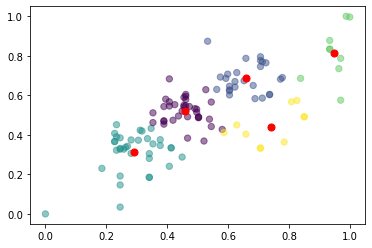

n_clusters value: 6 

[[0.30745406 0.35809725]
 [0.67602726 0.67757932]
 [0.68742515 0.40732357]
 [0.45544206 0.52874599]
 [0.96182635 0.82972703]
 [0.22925577 0.13905269]]


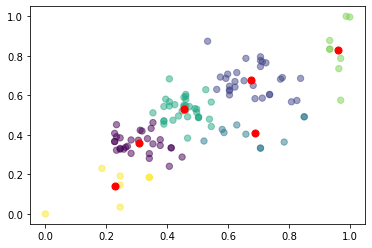

n_clusters value: 7 

[[0.79740519 0.59442965]
 [0.30745406 0.35809725]
 [0.45041168 0.52833722]
 [0.63016823 0.70014584]
 [0.96065013 0.86608332]
 [0.63539587 0.39251369]
 [0.22925577 0.13905269]]


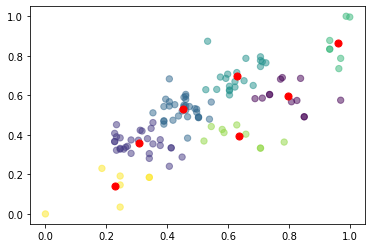

n_clusters value: 8 

[[0.63539587 0.39251369]
 [0.96065013 0.86608332]
 [0.27215569 0.37629827]
 [0.45228293 0.53599368]
 [0.63532934 0.70372836]
 [0.79740519 0.59442965]
 [0.18443114 0.12063915]
 [0.38522954 0.30104305]]


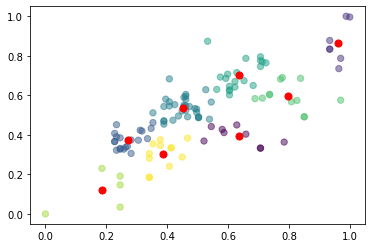

n_clusters value: 9 

[[0.8072945  0.59544849]
 [0.38522954 0.30104305]
 [0.44369326 0.52965938]
 [0.96065013 0.86608332]
 [0.63539587 0.39251369]
 [0.67835757 0.78733118]
 [0.26788528 0.37178499]
 [0.60741018 0.64630493]
 [0.18443114 0.12063915]]


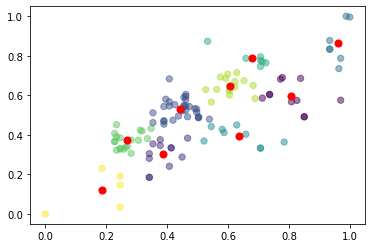

n_clusters value: 10 

[[0.79740519 0.59442965]
 [0.36581383 0.276843  ]
 [0.46176877 0.54399263]
 [0.96065013 0.86608332]
 [0.63539587 0.39251369]
 [0.37075848 0.43808256]
 [0.24775449 0.35236352]
 [0.60607357 0.65655317]
 [0.67835757 0.78733118]
 [0.16367265 0.06036396]]


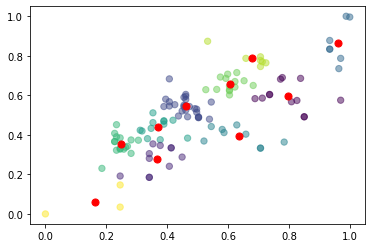

In [13]:
for k in range(2,11):
        print('n_clusters value:',k,'\n')
        df2  = df_scaled[['Width', 'Length']]
        kmeans = KMeans(n_clusters=k,n_init=3).fit(df2)
        centroids = kmeans.cluster_centers_
        print(centroids)

        plt.scatter(df2['Width'], df2['Length'], c= kmeans.labels_.astype(float), s=40, alpha=0.5)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
        plt.show()

#### SEMANTIC EVALUATION

In [14]:
clusterer = KMeans(n_clusters=5, random_state=10)
cluster_labels = clusterer.fit_predict(df2)

df2['Cluster'] = cluster_labels
df2['Model']=df['Model']

In [15]:
for Cluster in df2.Cluster.unique():
    print(Cluster)
    print(df2[df2.Cluster == Cluster].Model.unique())

1
['Integra' 'A4' '328i' 'Cavalier' 'Prizm' 'Metro' 'Escort' 'Civic' 'CR-V'
 'Accent' 'Elantra' 'Wrangler' 'Cherokee' 'Mirage' 'Eclipse'
 'Montero Sport' 'C-Class' 'Sentra' 'Bravada' 'Sunfire' 'Boxter'
 'Carrera Coupe' 'Carrera Cabrio' 'SL' 'SC' 'SW' 'Corolla' 'Celica'
 'Tacoma' 'RAV4' '4Runner' 'Golf' 'Jetta' 'Cabrio' 'GTI']
2
['TL' 'RL' '528i' 'Catera' 'Malibu' 'Sebring Coupe' 'Sebring Conv.'
 'Cirrus' 'Avenger' 'Stratus' 'Contour' 'Explorer' 'Ranger' 'Accord'
 'Passport' 'Sonata' 'I30' 'Grand Cherokee' 'ES300' 'GS300' 'Galant'
 'Diamante' '3000GT' 'Montero' 'Mystique' 'Cougar' 'Mountaineer' 'E-Class'
 'SL-Class' 'Altima' 'Maxima' 'Pathfinder' 'Cutlass' 'Breeze' 'Grand Am'
 'Camry' 'Avalon' 'Passat']
4
['A6' 'Corvette' 'Neon' 'Viper' 'Ram Wagon' 'Caravan' 'Mustang' 'Voyager'
 'Land Cruiser']
0
['A8' 'Century' 'Regal' 'Park Avenue' 'LeSabre' 'DeVille' 'Eldorado'
 'Lumina' 'Monte Carlo' 'Camaro' 'Concorde' 'LHS' 'Dakota' 'Taurus'
 'Windstar' 'Odyssey' 'LS400' 'Continental' 'Sable' 'Vil

In [16]:
c5=df2['Cluster'].value_counts()
c5=pd.DataFrame(c5)
c5.sort_values(by=['Cluster'])

,Cluster
3,7
4,10
0,27
1,35
2,38


In [17]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(df3)

df3['Cluster'] = cluster_labels
df3['Model']=df['Model']

In [18]:
for Cluster in df3.Cluster.unique():
    print(Cluster)
    print(df3[df3.Cluster == Cluster].Model.unique())

1
['Integra' 'A4' '328i' 'Cavalier' 'Prizm' 'Metro' 'Escort' 'Civic' 'CR-V'
 'Accent' 'Elantra' 'Wrangler' 'Cherokee' 'Mirage' 'Eclipse'
 'Montero Sport' 'C-Class' 'Sentra' 'Bravada' 'Sunfire' 'Boxter'
 'Carrera Coupe' 'Carrera Cabrio' 'SL' 'SC' 'SW' 'Corolla' 'Celica'
 'Tacoma' 'RAV4' '4Runner' 'Golf' 'Jetta' 'Cabrio' 'GTI']
2
['TL' 'RL' '528i' 'Catera' 'Malibu' 'Corvette' 'Sebring Coupe'
 'Sebring Conv.' 'Cirrus' 'Neon' 'Avenger' 'Stratus' 'Mustang' 'Contour'
 'Explorer' 'Ranger' 'Accord' 'Passport' 'Sonata' 'I30' 'Grand Cherokee'
 'ES300' 'GS300' 'Galant' 'Diamante' '3000GT' 'Montero' 'Mystique'
 'Cougar' 'Mountaineer' 'E-Class' 'SL-Class' 'Altima' 'Maxima'
 'Pathfinder' 'Cutlass' 'Breeze' 'Grand Am' 'Camry' 'Avalon' 'Passat']
0
['A6' 'A8' 'Century' 'Regal' 'Park Avenue' 'LeSabre' 'DeVille' 'Eldorado'
 'Lumina' 'Monte Carlo' 'Camaro' 'Concorde' 'LHS' 'Viper' 'Dakota'
 'Caravan' 'Taurus' 'Windstar' 'Odyssey' 'LS400' 'Continental' 'Sable'
 'Villager' 'S-Class' 'Quest' 'Aurora' 'Silhou

In [19]:
c4=df3['Cluster'].value_counts()
c4=pd.DataFrame(c4)
c4.sort_values(by=['Cluster'])

,Cluster
3,8
0,32
1,35
2,42


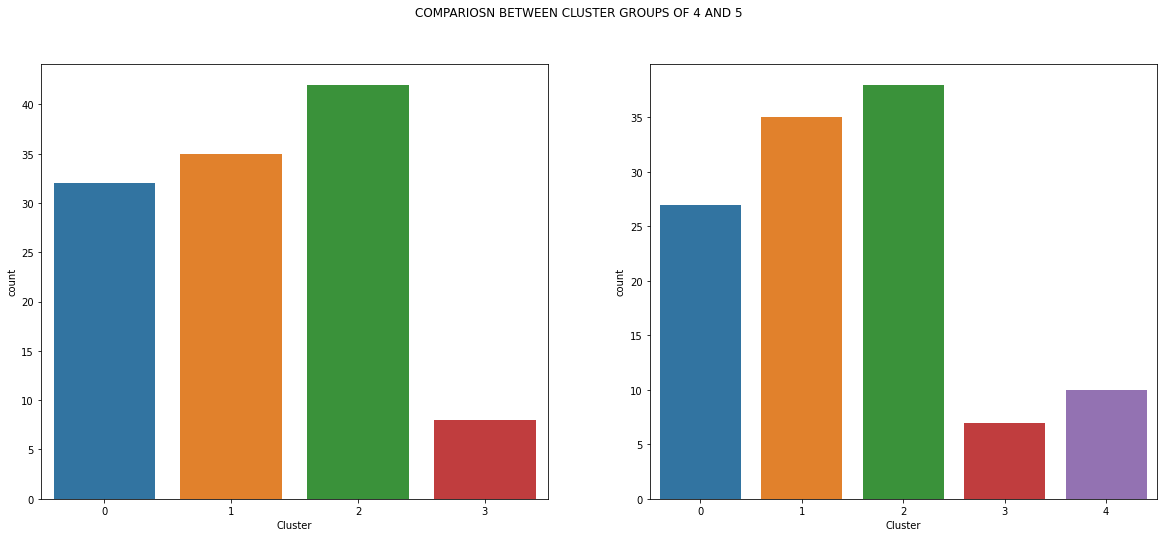

In [20]:
#comparing k=4 and 5
fig, ax = plt.subplots(1,2,figsize = (20, 8))
sns.countplot(x = df3['Cluster'], ax = ax[0])
sns.countplot(x = df2['Cluster'], ax = ax[1])
plt.suptitle('COMPARIOSN BETWEEN CLUSTER GROUPS OF 4 AND 5 ')
plt.show()

n_clusters =5 is considered after comparing

In [21]:
#END